In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

In [2]:
a1 = pd.read_excel("/content/drive/MyDrive/bank_internal.xlsx")
a2 = pd.read_excel("/content/drive/MyDrive/cibil.xlsx")

In [3]:
df = pd. merge ( a1, a2, how ='inner', left_on = ['PROSPECTID'], right_on = ['PROSPECTID'] )

In [4]:
df.head()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,...,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,...,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,...,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,4,1,0,1,1,0,1.000,0.0,1.000,0.000,...,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,5,3,2,1,0,0,0.000,0.0,0.333,0.667,...,0.0,0.0,0.0,-99999.000,0,0,AL,AL,753,P1


In [5]:
df.select_dtypes(include='number').drop(columns=df.columns[0]).describe().to_csv('Data-statistical-Summary.csv')

<Axes: >

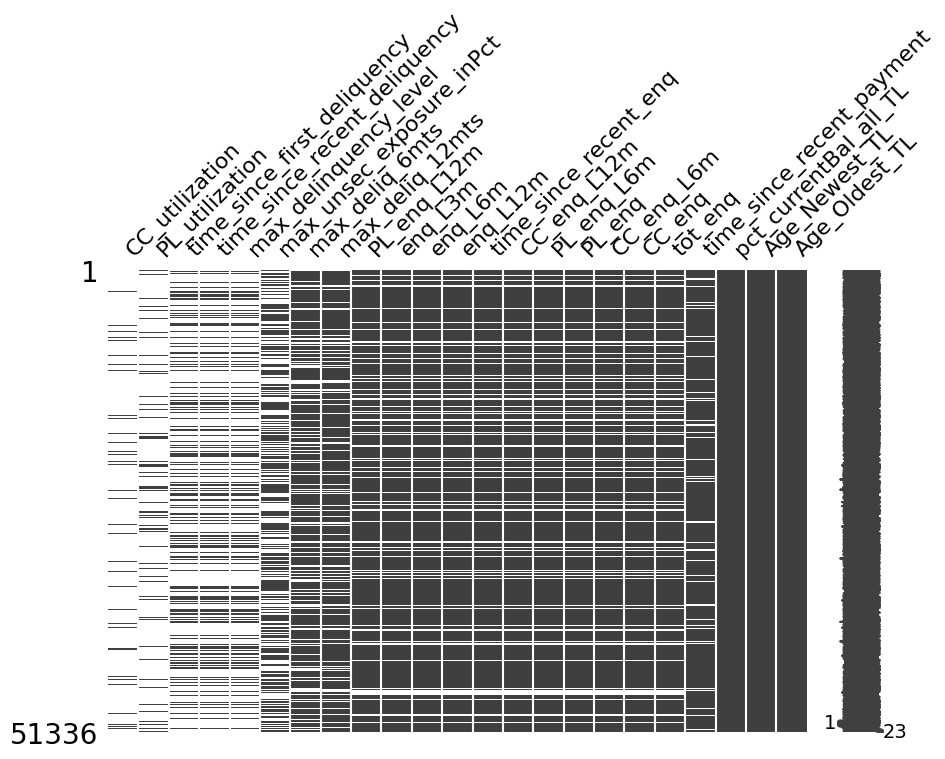

In [6]:
columns_having_missing_values = (df.replace(-99999, np.nan).isna().mean()
.loc[lambda ser: ser > 0].mul(100).sort_values(ascending=False).index.tolist()
)
msno.matrix(df=df.loc[:, columns_having_missing_values].replace(-99999, np.nan), figsize=(10, 6))


In [12]:
df.replace(-99999, np.nan, inplace=True)

In [17]:
final_df =  df.columns[df.isna().any()].tolist()

['Age_Oldest_TL',
 'Age_Newest_TL',
 'time_since_recent_payment',
 'time_since_first_deliquency',
 'time_since_recent_deliquency',
 'max_delinquency_level',
 'max_deliq_6mts',
 'max_deliq_12mts',
 'tot_enq',
 'CC_enq',
 'CC_enq_L6m',
 'CC_enq_L12m',
 'PL_enq',
 'PL_enq_L6m',
 'PL_enq_L12m',
 'time_since_recent_enq',
 'enq_L12m',
 'enq_L6m',
 'enq_L3m',
 'pct_currentBal_all_TL',
 'CC_utilization',
 'PL_utilization',
 'max_unsec_exposure_inPct']

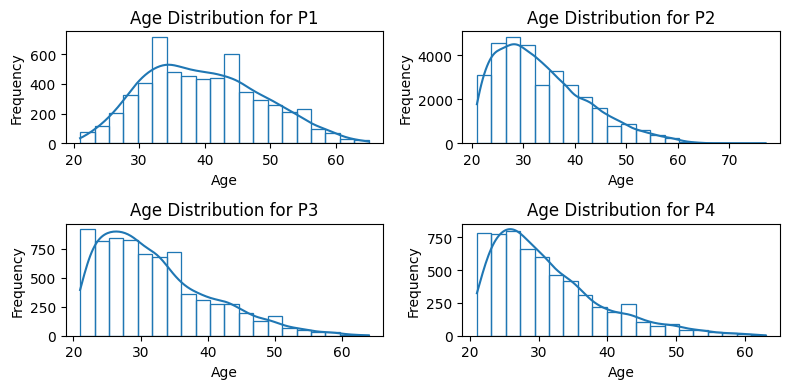

In [26]:
fig, axs = plt.subplots(2, 2, figsize=(8, 4))
flags = ['P1', 'P2', 'P3', 'P4']

for i, flag in enumerate(flags):
    sns.histplot(df[df['Approved_Flag'] == flag], x='AGE', kde=True, bins=20, ax=axs.flat[i], fill=False)
    axs.flat[i].set_title(f'Age Distribution for {flag}')
    axs.flat[i].set_xlabel('Age')
    axs.flat[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


**Time Since Delinquency Columns**

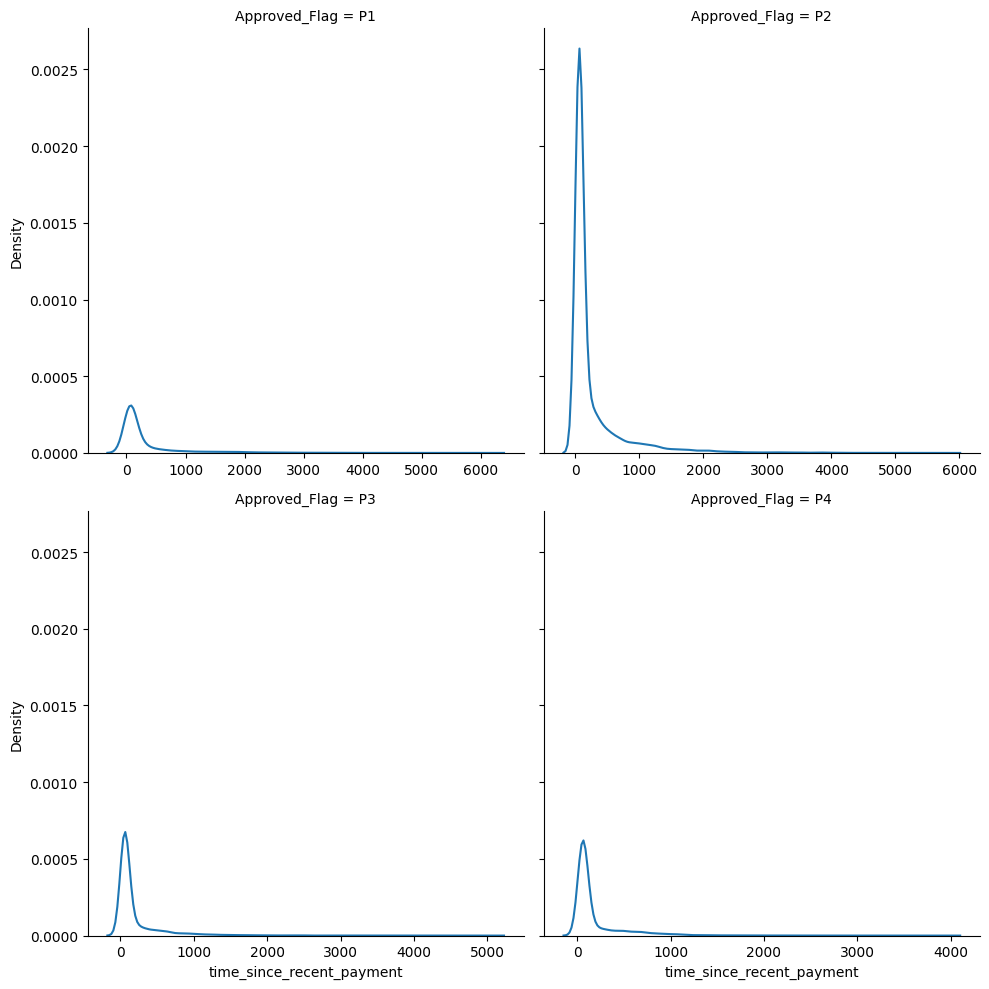

In [18]:
sns.displot(data=df, x='time_since_recent_payment', kind='kde', col='Approved_Flag',
            col_wrap=2, col_order=[f'P{i}' for i in range(1, 5)], facet_kws={'sharex': False})


<Axes: ylabel='time_since_recent_payment'>

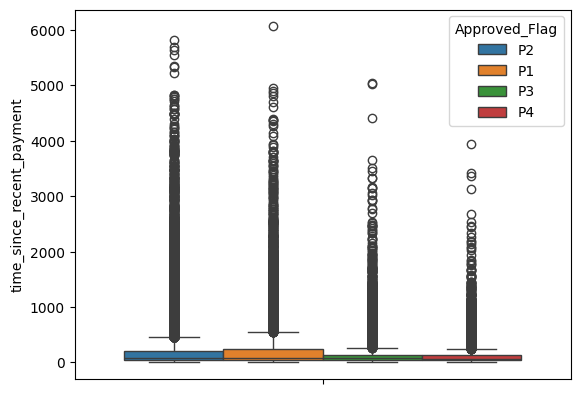

In [20]:
sns.boxplot(data=df, y='time_since_recent_payment', hue='Approved_Flag')

The feature has highly right skewed data

**Observations**

1. Majority of the obervations are in very restrictive time limits, whereas some values are very extreme.

2. Based on the plots it seems that this feature is not strongly associated with the target.

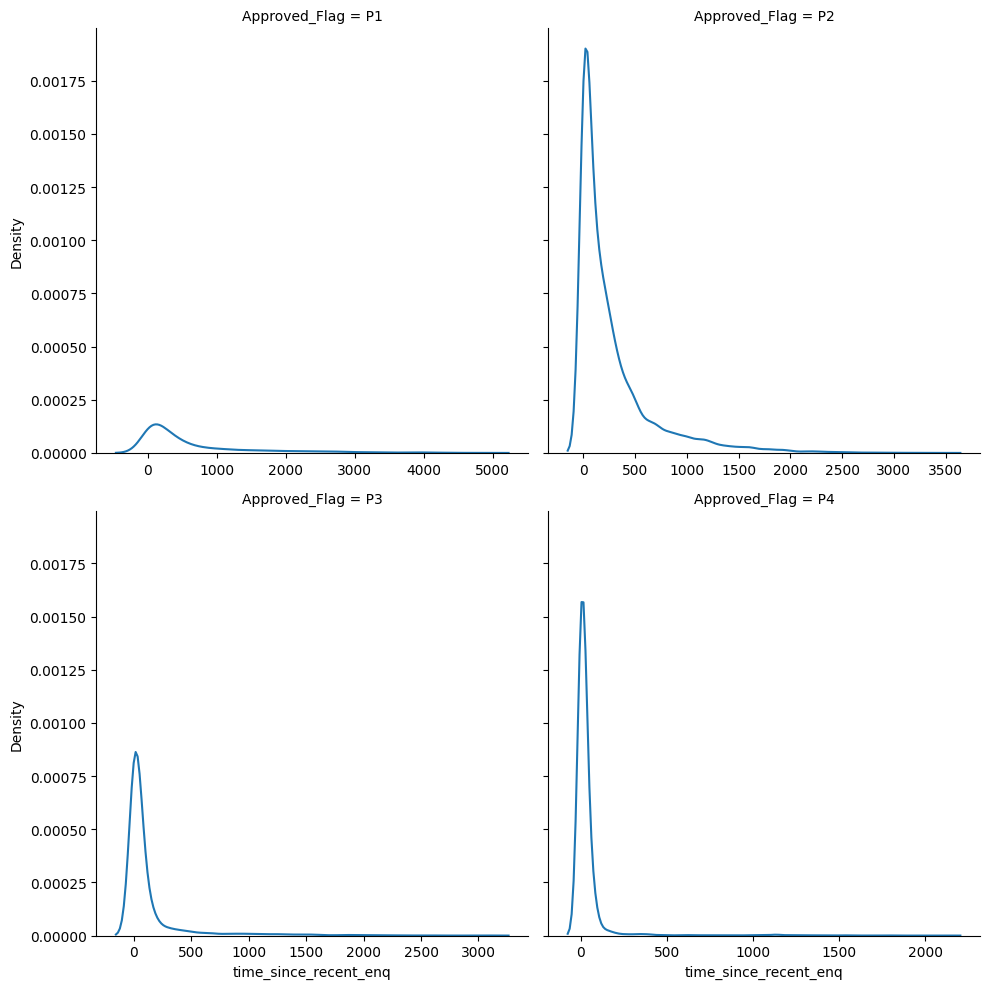

In [23]:
sns.displot(data=df, x='time_since_recent_enq', kind='kde', col_wrap=2,
            col='Approved_Flag', col_order=[f'P{i}' for i in range(1,5)],facet_kws={'sharex': False});

<Axes: ylabel='time_since_recent_enq'>

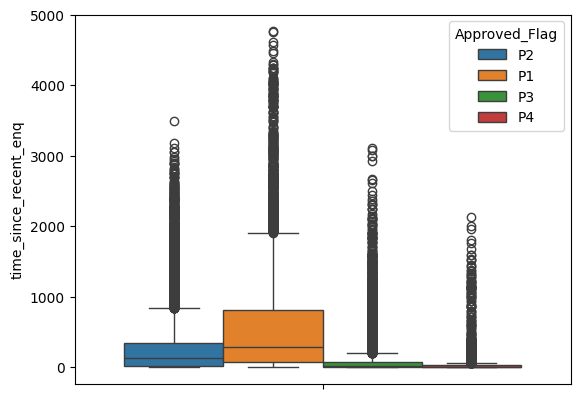

In [24]:
sns.boxplot(data=df, y='time_since_recent_enq', hue='Approved_Flag')

The distribution of the feature changes with the category of the target variable(Seems to be an important feature)

**Observations**:

1. We can clearly see that the customers with flags P1 and P2 have last enquiry times on the higher side as compared to the customers with flags P3 and P4.
2. This pattern shows that customers who have a higher probability of defaulting on their credits are those who frequently enquire for more and more credits, so as to payoff the previous ones.

<Axes: ylabel='num_std_12mts'>

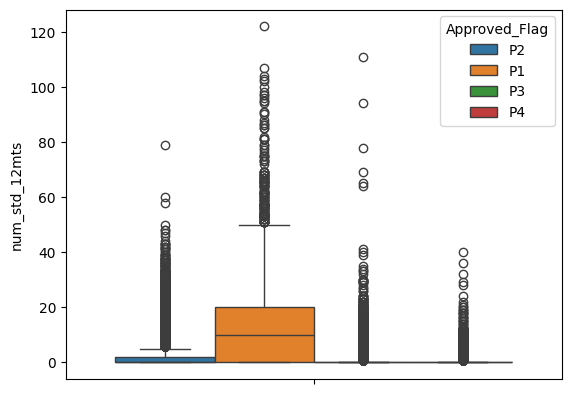

In [37]:
sns.boxplot(data =df, y='num_std_12mts', hue='Approved_Flag')

**Observations**:
*The number of standard payments in the last 12 months is a crucial factor. Fewer payments can indicate poor repayment behavior and higher credit risk*

1. The feature num_std_12mts shows distinct distributions across categories, making it a crucial factor in differentiating risk levels.
2. Customers with fewer standard payments (P3, P4) are likely to have higher credit risk, while P1 and P2 customers exhibit better repayment behavior.

<Axes: ylabel='recent_level_of_deliq'>

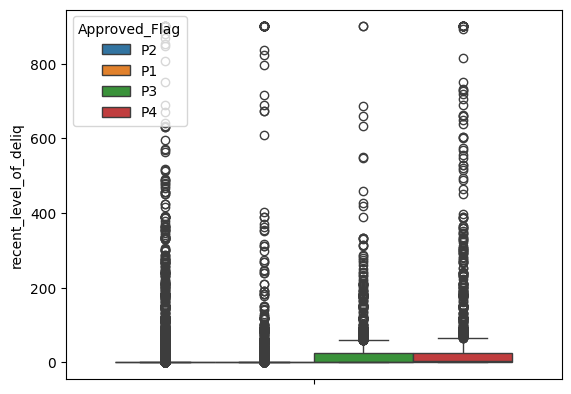

In [42]:
sns.boxplot(data=df, y='recent_level_of_deliq',
            hue='Approved_Flag')

In [73]:
age_tl_subset = df.filter(regex="Age_").columns.to_list()
age_tl_subset

['Age_Oldest_TL', 'Age_Newest_TL']

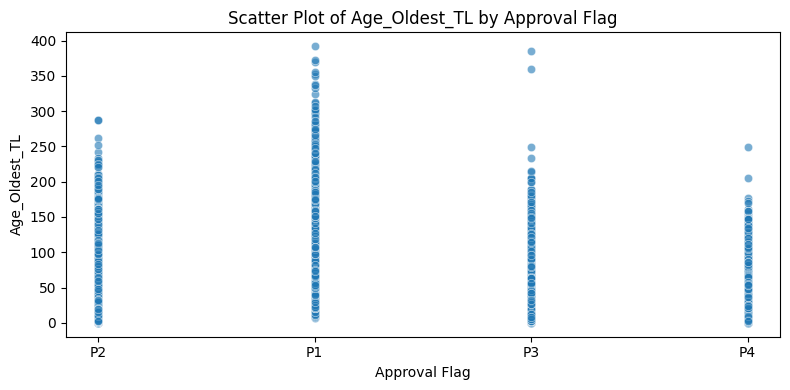

In [84]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='Approved_Flag', y="Age_Oldest_TL", alpha=0.6)
plt.title(f'Scatter Plot of Age_Oldest_TL by Approval Flag')
plt.xlabel('Approval Flag')
plt.ylabel('Age_Oldest_TL')



plt.tight_layout()
plt.show()


**Observation**:
1. This feature is crucial in credit risk assessment because a longer credit history often signals more experience in managing credit, implying lower credit risk.

2. Customers with older trade lines (like P1 and P2) are generally perceived as more reliable.







